This script creates a map using a function, creates random points on the surface, and contours those points. At the end a plot is created of the contoured maps with the orginial map. 

In [ ]:
import numpy as np 
from numpy.random import rand
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import interpolate

In [ ]:
#This is our physical map
def f(x,y):    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

In [ ]:
nwells = [20, 20, 20, 20]

In [ ]:
#set the contour interval
c_interval = 20
bigger = 100

In [ ]:
xreal, yreal = np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
xreal, yreal = np.meshgrid(xreal, yreal)
net_payreal = f(xreal, yreal)
net_payreal = bigger*(net_payreal - net_payreal.min())

In [ ]:
fig = plt.figure(figsize=(20, 4), facecolor='white')
for i, w in enumerate(nwells):
    #make coordinates for each well
    x = 6*rand(w)-3
    y = 6*rand(w)-3
    
    net_pay = f(x,y)
    net_pay = bigger*( net_pay - min(net_pay) )
    
    #
    #Do Contouring    
    # Set up a regular grid of interpolation points
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate
    rbf = interpolate.Rbf(x, y, net_pay, function='linear')
    zi = rbf(xi, yi)
    
    plt.subplot(1,len(nwells)+1,(i+1))
    
        
    #plt.imshow(zi, vmin=min(net_pay), vmax=max(net_pay), origin='lower', cmap=cm.gist_earth, extent = (-3,3,-3,3), alpha=0.5)
    plt.imshow(zi, vmin=net_payreal.min(), vmax=net_payreal.max(), origin='lower', cmap=cm.gist_earth, extent = (-3,3,-3,3), alpha=0.5)
    plt.colorbar(shrink=0.5)
    plt.scatter(x, y, c= net_pay, vmin=net_payreal.min(), vmax=net_payreal.max(), marker = 'o',s=50,linewidths=0.05, cmap=cm.gist_earth)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    #do contours, or filled contours (contour or contourf)
    C = plt.contour(xi, yi, zi, np.arange (0,max(net_pay),c_interval) , colors='black', linewidth=.5, alpha=0.5)
    plt.clabel(C, inline=1, fontsize=10, fmt= '%1.0f')
    plt.axis('off')
    plt.title('%s wells' % w)

plt.subplot(1, len(nwells)+1, len(nwells)+1)


plt.imshow(net_payreal , vmin=net_payreal.min(), vmax=net_payreal.max(), origin='lower',
            extent=[-3, 3, -3, 3], cmap=cm.gist_earth, alpha=1.0)
plt.colorbar(shrink=0.5)
C = plt.contour(xreal, yreal, net_payreal, np.arange (0,net_payreal.max(),c_interval) , colors='black', linewidth=.5, alpha=0.5)
plt.clabel(C, inline=1, fontsize=10, fmt= '%1.0f')
plt.axis('off')
plt.title('the earth')
plt.show()

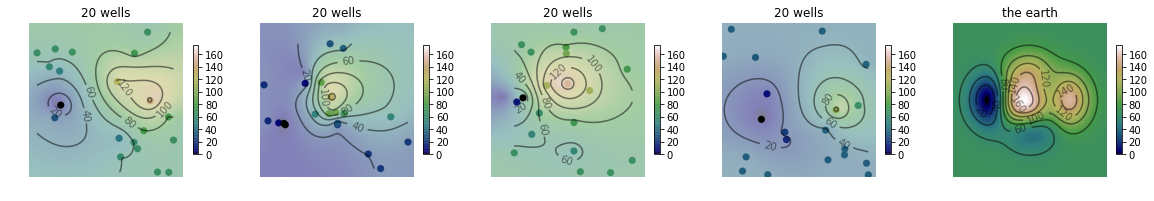

In [8]:
#savefig('Net_pay_random_sampler.png', format='png')